In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def midpoints(x):
    sl = ()
    for _ in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

In [4]:
with open('map_example.3dmap', 'r') as f:
    data = f.readlines()

[896, 390, 255]


ValueError: Argument filled must be 3-dimensional

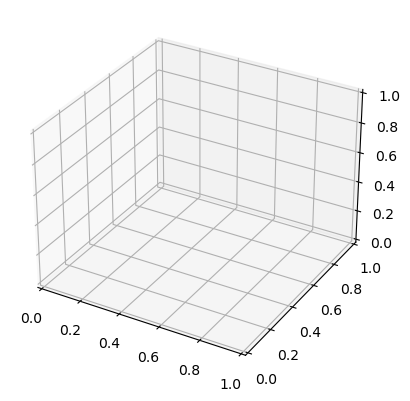

In [8]:
# Extract the dimensions and voxel data from the file
dimensions = list(map(int, data[0].split()[1:]))
print(dimensions)
voxels = np.array([list(map(int, line.split())) for line in data[1:]])

# Create a 3D grid for plotting
x, y, z = np.indices(dimensions)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the voxels
ax.voxels(x, y, z, voxels, edgecolor='k')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Voxel Map')

# Show the plot
plt.show()

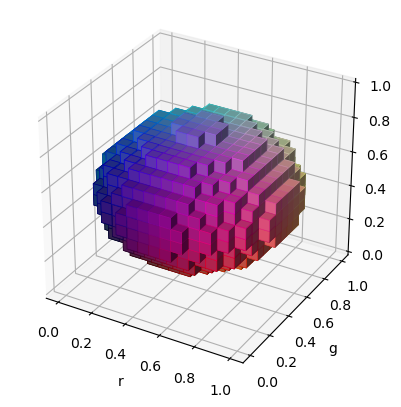

In [3]:
# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + 2*(bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
ax = plt.figure().add_subplot(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
ax.set_aspect('equal')

plt.show()